# Assignment 2- CNN - Ian Feekes

## Initial Imports and Configuration

In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Dense
from keras import optimizers
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import numpy as np

## Part 1

### Read Initial Data

In [2]:
# Create train and test dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### 1.a. Create a visualization of your input data

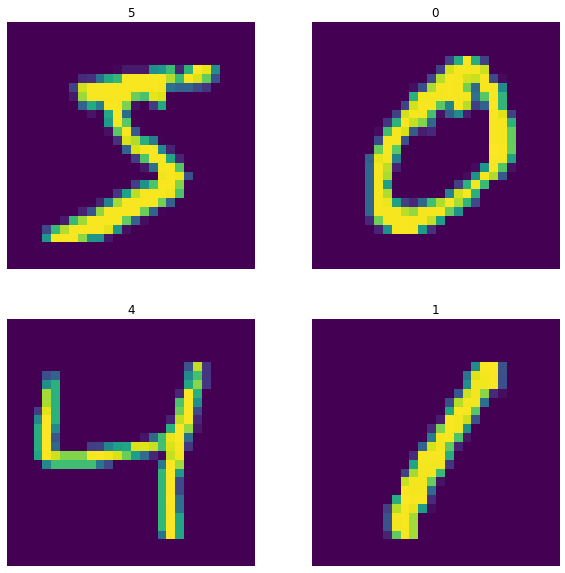

In [3]:
#1.a. Create the visualization here
# Let's look into the dataset by visualizing some data points
plt.figure(figsize=(10, 10))

for i in range(4):  
  ax = plt.subplot(2, 2, i + 1)
  plt.imshow(X_train[i])
  plt.title(y_train[i])
  plt.axis("off")

In [4]:
#preprocessing
# Kears allows us to add the number of channels either to the beggining of shape or the end of it
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [5]:
# You need to apply some preprocessing on X and y

# normalize inputs from 0-255 to 0-1
# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# First we determine how many categories we're using. We know it's 1-10 but future problems may not be this way.
categoryList = []
for i in y_train:
  if i not in categoryList:
    categoryList.append(i)
for i in y_test:
  if i not in categoryList:
    categoryList.append(i)
numCategories = len(categoryList)
assert(numCategories==10)

# Encode Outputs
y_train = tf.one_hot(y_train.astype(np.int32), depth=numCategories)
y_test = tf.one_hot(y_test.astype(np.int32), depth=numCategories)

### 1.b. Create a CNN model

Create a CNN model with 4 convolution layers in which two of them have 32 and two of them have 64 filters. The fully connected layer has one hidden layer (512 nodes). Draw the Learning curve. What is your understanding from learning curve? Batch size=128 and epochs=20

In [6]:
X_train[0].shape

(28, 28, 1)

In [7]:
# Initialize the CNN, which is a sequence of layers ergo usage of Sequential class - the same class that would be used for an ANN
model = tf.keras.models.Sequential()

# Add the first convolutional layer
model.add(tf.keras.layers.Conv2D(filters = 32,              # 32 feature detectors applied to image
                               kernel_size = 2,             # Size of feature detector is 3x3 matrix, but other sizes and feature detectors can be used. Possibly use a larger kernel size for our first layer
                               activation = 'relu',         # Relu activation function used
                               input_shape = (28, 28, 1))) 
# Add the first pooling layer. Max Pooling sources highest pixel value in each frame
model.add(tf.keras.layers.MaxPool2D())

# Add next series of convolutional and pooling layers
model.add(tf.keras.layers.Conv2D(filters = 32, activation = 'relu', kernel_size=2))
model.add(tf.keras.layers.MaxPool2D())

# Add the third series of convolution and pooling layers, now with 64 filters
model.add(tf.keras.layers.Conv2D(filters = 64, activation = 'relu', kernel_size=2))
model.add(tf.keras.layers.MaxPool2D())

# Add the fourth and final series of convolutional and pooling layers
model.add(tf.keras.layers.Conv2D(filters = 64, activation = 'relu', kernel_size=2))

# Add a flattening layer to effectively created a 1D layers that serves to the fully-connected ANN
model.add(tf.keras.layers.Flatten())

# Add a fully-connected neural network with 512 nodes
model.add(tf.keras.layers.Dense(units = 512, activation = 'relu'))

# Add the output layer which has 10 nodes for each category and softmax for multiclass classification
model.add(tf.keras.layers.Dense(units = numCategories, activation = 'softmax'))

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])
hist = model.fit(X_train, y_train, validation_split = 0.2, batch_size = 128, epochs=20) # Start training the model

Epoch 1/20
375/375 [==============================] - 11s 6ms/step - loss: 0.4655 - accuracy: 0.8537 - val_loss: 0.1519 - val_accuracy: 0.9511
Epoch 2/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1258 - accuracy: 0.9605 - val_loss: 0.0911 - val_accuracy: 0.9712
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0887 - accuracy: 0.9713 - val_loss: 0.0698 - val_accuracy: 0.9787
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0708 - accuracy: 0.9775 - val_loss: 0.0721 - val_accuracy: 0.9768
Epoch 5/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0563 - accuracy: 0.9824 - val_loss: 0.0597 - val_accuracy: 0.9830
Epoch 6/20
375/375 [==============================] - 3s 7ms/step - loss: 0.0489 - accuracy: 0.9846 - val_loss: 0.0776 - val_accuracy: 0.9766
Epoch 7/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0440 - accuracy: 0.9865 - val_loss: 0.0542 - val_accuracy: 0.9829
Epoch

In [9]:
# Measure test accuracy
scores = model.evaluate(X_test,y_test)
print("Accuracy: %.2f%%" % (scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0665 - accuracy: 0.9859
Accuracy: 98.59%


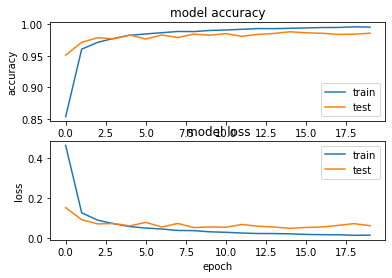

In [10]:
# Draw Learning curve
def learning_curve(hist):
  #Create a function to draw learning curves
  # This will help you to just call this function in future for drawing the learning curves
  plt.subplot(2,1,1)
  plt.plot(hist.history['accuracy'])
  plt.plot(hist.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='lower right')

  plt.subplot(2,1,2)
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  
  plt.show() 

learning_curve(hist)

### Understanding of Learning Curve

The accuracy of both the test and the validation is fairly precise. We can see from the loss curve that the validation loss may start to overfit a small amount around the 12th epoch as the training loss continues to go down and the validation loss plateaus and goes up very marginally. This overfitting is fairly small and likely can be dismissed in this case as the dataset is quite large. 

## Part 2- CIFAR10

In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D
from keras.datasets import mnist, cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.layers import Dense
from keras import optimizers
from tensorflow.keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
labels= ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
print(X_train.shape)
print(X_test.shape)

170498071/170498071 [==============================] - 3s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [3]:
# Draw Learning curve
def learning_curve(hist):
  #Create a function to draw learning curves
  # This will help you to just call this function in future for drawing the learning curves
  plt.subplot(2,1,1)
  plt.plot(hist.history['categorical_accuracy'])
  plt.plot(hist.history['val_categorical_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='lower right')

  plt.subplot(2,1,2)
  plt.plot(hist.history['loss'])
  plt.plot(hist.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper right')
  
  plt.show() 

### 2.a. Visualizing Data Points

In [4]:
# Useful structure mapping integers to the target variable during data visualization
labelMappings = {
    0: "airplane",
    1: "car",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

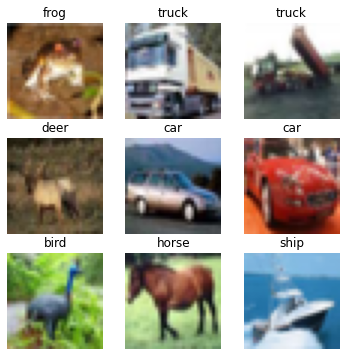

In [5]:
# 2.a. Let's look into the dataset by visualizing some data points
plt.figure(figsize=(6, 6))

for i in range(9):  
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(X_train[i])
  plt.title(labelMappings[y_train[i][0]])
  plt.axis("off")

### 2.b. Preprocessing

In [6]:
import keras.utils as utils 
num_classes = 10
epochs = 20

y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

datagen.fit(X_train)

# Create model here
model = tf.keras.models.Sequential([
    # First 4 convolutional layers
    tf.keras.layers.Conv2D(filters = 32, kernel_size=3, activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 32, kernel_size=3, activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 64, kernel_size=3, activation = 'relu'),
    tf.keras.layers.Conv2D(filters = 64, kernel_size=3, activation = 'relu'),
    tf.keras.layers.MaxPool2D(),
    # Hidden Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 512, activation = 'relu'),
    tf.keras.layers.Dense(units = 256, activation = 'relu'),
    # Output Layer - still has 10 nodes one for each category and softmax for multiclass classification
    tf.keras.layers.Dense(units = len(labels), activation = 'softmax')
])

opt = tf.keras.optimizers.SGD(
    learning_rate=0.005, momentum=0.0, nesterov=False, name="SGD"
)

# Could change optimizer to opt
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy']) # Compile model

hist = model.fit(datagen.flow(X_train, y_train, batch_size=128,
         subset='training'),
         validation_data=datagen.flow(X_train, y_train,
         batch_size=8, subset='validation'),
         epochs=epochs)

Epoch 1/20
313/313 [==============================] - 28s 85ms/step - loss: 2.0920 - accuracy: 0.3830 - val_loss: 1.5245 - val_accuracy: 0.4632
Epoch 2/20
313/313 [==============================] - 27s 87ms/step - loss: 1.3444 - accuracy: 0.5227 - val_loss: 1.2741 - val_accuracy: 0.5485
Epoch 3/20
313/313 [==============================] - 26s 84ms/step - loss: 1.1789 - accuracy: 0.5846 - val_loss: 1.2380 - val_accuracy: 0.5705
Epoch 4/20
313/313 [==============================] - 29s 91ms/step - loss: 1.0622 - accuracy: 0.6267 - val_loss: 1.0758 - val_accuracy: 0.6253
Epoch 5/20
313/313 [==============================] - 27s 87ms/step - loss: 0.9654 - accuracy: 0.6654 - val_loss: 1.0192 - val_accuracy: 0.6439
Epoch 6/20
313/313 [==============================] - 26s 84ms/step - loss: 0.9059 - accuracy: 0.6854 - val_loss: 1.0275 - val_accuracy: 0.6497
Epoch 7/20
313/313 [==============================] - 27s 88ms/step - loss: 0.8277 - accuracy: 0.7123 - val_loss: 0.9671 - val_accuracy:

KeyError: ignored

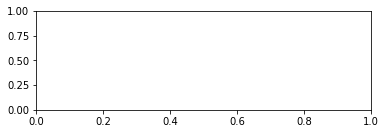

In [7]:
# Draw learning curve here
learning_curve(hist)

In [ ]:
base_model = model

In [ ]:
model.save('base_model')

##### Learning Curve Analysis: What is the issue and possible solution for this learning curve?

The loss function of the testing data tends to plateau around 10 epochs indicating overfitting. The validation accuracy also stops sees very diminishing rising retuns after around 10 epochs

In [ ]:
# 2.d- This part is up to you to choose proper pre-trained model
# I chose VGG16 and RESNet50
# Implementing VGG16
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
import numpy as np

datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

datagen.fit(X_train)

vgg_model = retrained_model = tf.keras.applications.VGG16(weights='imagenet', include_top=False)
vgg_model.trainable = True

model = tf.keras.Sequential([
    tf.keras.layers.Lambda(lambda data: tf.keras.applications.vgg16.preprocess_input(tf.cast(data, tf.float32))),
    vgg_model,
    tf.keras.layers.Dense(units = 512, activation = 'relu'),
    tf.keras.layers.Dense(units = 256, activation = 'relu'),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(labels), activation='softmax', name='objectProb')
])

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['categorical_accuracy'])   #Compile VGG16 model

hist = model.fit(datagen.flow(X_train, y_train, batch_size=128,
         subset='training'),
         validation_data=datagen.flow(X_train, y_train,
         batch_size=8, subset='validation'),
         epochs=20)


In [ ]:
model.save('vgg_model')

In [ ]:
# Draw learning curve
learning_curve(hist)

In [ ]:
model.evaluate(X_test, y_test, batch_size=256, verbose=1)

In [ ]:
# This ios my second pre-trained model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.layers import GlobalAveragePooling2D

resnet_model = ResNet50()
resnet_model.trainable = True


datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)

datagen.fit(X_train)

model_resnet = tf.keras.Sequential([
    # tf.keras.layers.Lambda(lambda data: tf.keras.applications.resnet50.preprocess_input(tf.cast(data, tf.float32))),
    resnet_model,
    # tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(units = 512, activation = 'relu'),
    tf.keras.layers.Dense(units = 256, activation = 'relu'),
    tf.keras.layers.Dense(len(labels), activation='softmax', name='objectProb')
])

model_resnet.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['categorical_accuracy'])   #Compile ResNet50
model_resnet.summary()

In [ ]:
# Let's train the model using RMSprop
hist_resnet = model_resnet.fit(datagen.flow(X_train, y_train, batch_size=128,
         subset='training'),
         validation_data=datagen.flow(X_train, y_train,
         batch_size=8, subset='validation'),
         epochs=20)

In [ ]:
model_resnet.save('resnet_model')

In [ ]:
learning_curve(hist_resnet)

In [ ]:
model_resnet.evaluate(X_test, y_test, batch_size=256, verbose=1)